<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Logistic_Regression(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression Explained

Logistic Regression is a statistical model used for **binary classification** tasks. Despite its name, it is a classification algorithm, not a regression algorithm in the traditional sense (where the output is a continuous value). Instead, it predicts the probability that a given input belongs to a certain class.

### Key Concepts:

1.  **Binary Classification:** It's primarily used when the outcome variable is categorical and has two possible outcomes (e.g., Yes/No, True/False, 0/1, Spam/Not Spam, Disease/No Disease).

2.  **Sigmoid Function (Logistic Function):** The core of logistic regression is the sigmoid (or logistic) function. This function takes any real-valued number and maps it to a value between 0 and 1, which can be interpreted as a probability. The formula for the sigmoid function is:

    $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

    Where $z$ is a linear combination of input features and their corresponding weights (similar to linear regression):

    $$ z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n $$

    -   $e$ is the base of the natural logarithm (approximately 2.718)
    -   $z$ is the input to the function, often referred to as the "logit"

3.  **Probability Interpretation:** The output of the sigmoid function, $\sigma(z)$, represents the probability of the event occurring (i.e., the probability that the dependent variable belongs to class 1). For example, if $\sigma(z) = 0.8$, it means there's an 80% chance of the instance belonging to class 1.

4.  **Decision Boundary:** To classify an instance into one of the two classes, a threshold (often 0.5) is applied to the predicted probability. If the probability is greater than or equal to the threshold, it's classified as class 1; otherwise, it's classified as class 0.

### How it Works (Intuition):

Imagine you want to predict if a student will pass an exam based on the hours they studied. A simple linear regression might predict a score, but you want a pass/fail outcome. Logistic regression works by:

1.  **Calculating a 'Score' (Logit):** It first calculates a linear combination of the input features (e.g., hours studied) and their weights. This is similar to what happens in linear regression, but this 'score' ($z$) isn't directly the probability.

2.  **Transforming to Probability:** This 'score' ($z$) is then fed into the sigmoid function, which squashes it into a probability between 0 and 1. A higher 'score' will result in a higher probability.

3.  **Making a Decision:** Based on a chosen threshold (e.g., 0.5), if the calculated probability is, say, 0.7 (70%), the student is predicted to pass.

### Training the Model:

Unlike linear regression which uses Mean Squared Error, logistic regression uses a **cost function** called **Log Loss** (also known as Cross-Entropy Loss). The goal during training is to find the optimal weights ($\beta_0, \beta_1, ..., \beta_n$) that minimize this cost function. This optimization is typically done using an iterative optimization algorithm like **Gradient Descent**.

### Advantages:

*   **Simplicity and Interpretability:** Relatively easy to understand and implement. The coefficients can be interpreted in terms of the log-odds.
*   **Efficiency:** Computationally efficient and scales well to large datasets.
*   **Output Probabilities:** Provides probabilities for the predictions, which can be useful for decision-making.
*   **Good Baseline:** Often used as a baseline model due to its simplicity and performance.

### Disadvantages:

*   **Linear Decision Boundary:** Assumes a linear relationship between the independent variables and the log-odds of the dependent variable. It may not perform well if the relationship is complex or non-linear.
*   **Sensitivity to Outliers:** Can be sensitive to outliers in the data.
*   **Multicollinearity:** Can suffer from multicollinearity among independent variables.

### Use Cases:

*   **Medical Diagnosis:** Predicting the probability of a disease based on symptoms.
*   **Email Spam Detection:** Classifying emails as spam or not spam.
*   **Credit Scoring:** Assessing the likelihood of loan default.
*   **Marketing:** Predicting whether a customer will purchase a product.
*   **Quality Control:** Identifying defective products on an assembly line.

In essence, Logistic Regression is a fundamental and powerful algorithm for binary classification, providing a probabilistic understanding of class membership.

#Program 1

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Sample data (Hours studied vs Pass)
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([0, 0, 0, 1, 1, 1])

# Model
model = LogisticRegression()
model.fit(X, y)

# Prediction
new_student = [[3.5]]
pred = model.predict(new_student)
prob = model.predict_proba(new_student)

print("Prediction:", pred)
print("Probability:", prob)


Prediction: [1]
Probability: [[0.49996763 0.50003237]]


#Program 2

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Random dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,   # Fix
    n_repeated=0,
    random_state=42
)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prediction
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8


#Program 3

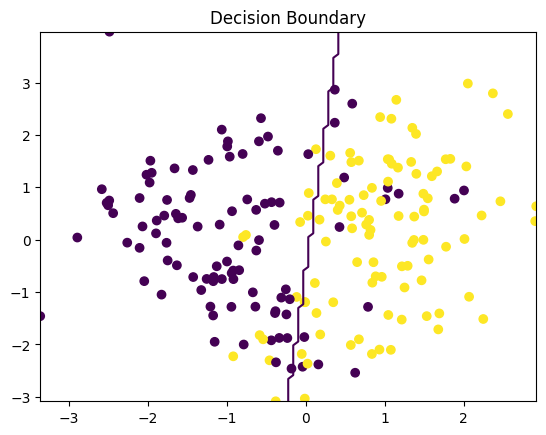

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)

# Decision boundary
x1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
x2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)

xx1, xx2 = np.meshgrid(x1, x2)
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = lr.predict(grid).reshape(xx1.shape)

plt.contour(xx1, xx2, probs, levels=[0.5])
plt.title("Decision Boundary")
plt.show()


#Program 4

In [20]:
import numpy as np

class MyLogistic:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)

            dw = (1/self.m) * np.dot(X.T, (y_pred - y))
            db = (1/self.m) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        y_pred = self.sigmoid(z)
        return [1 if i > 0.5 else 0 for i in y_pred]


In [21]:
model = MyLogistic()
model.fit(X, y)
print(model.predict(X))


[1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0]


#Program 5

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Sample dataset
data = pd.DataFrame({
    'hours': [1,2,3,4,5,6,7,8,2,3],
    'attendance': [60,65,70,75,80,85,90,95,55,68],
    'prev_score': [40,45,50,55,60,65,70,75,35,48],
    'internet': ['No','No','Yes','Yes','Yes','Yes','Yes','Yes','No','Yes'],
    'pass': [0,0,0,1,1,1,1,1,0,0]
})

X = data.drop('pass', axis=1)
y = data['pass']

# Column types
num_cols = ['hours','attendance','prev_score']
cat_cols = ['internet']

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pipeline.fit(X_train, y_train)

# Evaluation
y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Predict new student
new_student = pd.DataFrame({
    'hours':[5],
    'attendance':[80],
    'prev_score':[60],
    'internet':['Yes']
})

print("Prediction:", pipeline.predict(new_student))
print("Probability:", pipeline.predict_proba(new_student))


[[2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Prediction: [1]
Probability: [[0.18981537 0.81018463]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [23]:
data

,hours,attendance,prev_score,internet,pass
0,1,60,40,No,0
1,2,65,45,No,0
2,3,70,50,Yes,0
3,4,75,55,Yes,1
4,5,80,60,Yes,1
5,6,85,65,Yes,1
6,7,90,70,Yes,1
7,8,95,75,Yes,1
8,2,55,35,No,0
9,3,68,48,Yes,0


In [24]:
print(X_train.head())


   hours  attendance  prev_score internet
8      2          55          35       No
2      3          70          50      Yes
1      2          65          45       No
5      6          85          65      Yes
7      8          95          75      Yes


In [25]:
pipeline.predict(X_test)


array([0, 0])

In [26]:
X_train_transformed = pipeline.named_steps['prep'].transform(X_train)
print(X_train_transformed)


[[-1.23959081 -1.75219161 -1.75219161  0.        ]
 [-0.76736574 -0.55068879 -0.55068879  1.        ]
 [-1.23959081 -0.95118973 -0.95118973  0.        ]
 [ 0.64930947  0.65081403  0.65081403  1.        ]
 [ 1.59375961  1.45181591  1.45181591  1.        ]
 [ 0.1770844   0.25031309  0.25031309  1.        ]
 [ 1.12153454  1.05131497  1.05131497  1.        ]
 [-0.29514067 -0.15018785 -0.15018785  1.        ]]


In [27]:
print("Before pipeline:")
print(X_train.head())

pipeline.fit(X_train, y_train)

print("\nAfter pipeline:")
print(X_train.head())


Before pipeline:
   hours  attendance  prev_score internet
8      2          55          35       No
2      3          70          50      Yes
1      2          65          45       No
5      6          85          65      Yes
7      8          95          75      Yes

After pipeline:
   hours  attendance  prev_score internet
8      2          55          35       No
2      3          70          50      Yes
1      2          65          45       No
5      6          85          65      Yes
7      8          95          75      Yes


#Program 6

In [28]:
data = pd.DataFrame({
    'income':[20000,50000,60000,30000,80000,25000,70000,40000],
    'age':[22,35,45,25,50,28,40,30],
    'credit_score':[600,750,800,650,820,620,780,700],
    'employment':['Private','Govt','Govt','Private','Business','Private','Govt','Private'],
    'approved':[0,1,1,0,1,0,1,1]
})

X = data.drop('approved', axis=1)
y = data['approved']

num_cols = ['income','age','credit_score']
cat_cols = ['employment']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression())
])

pipeline.fit(X, y)

new_applicant = pd.DataFrame({
    'income':[45000],
    'age':[32],
    'credit_score':[720],
    'employment':['Private']
})

print("Loan Approval:", pipeline.predict(new_applicant))
print("Approval Probability:", pipeline.predict_proba(new_applicant))


Loan Approval: [1]
Approval Probability: [[0.32401513 0.67598487]]


#Program 7

In [29]:
data = pd.DataFrame({
    'glucose':[90,140,130,85,160,120,150,95],
    'bmi':[22,30,28,21,35,26,32,23],
    'age':[25,45,40,23,50,35,48,28],
    'gender':['M','F','F','M','F','M','F','M'],
    'diabetes':[0,1,1,0,1,0,1,0]
})

X = data.drop('diabetes', axis=1)
y = data['diabetes']

num_cols = ['glucose','bmi','age']
cat_cols = ['gender']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression())
])

pipeline.fit(X, y)

new_patient = pd.DataFrame({
    'glucose':[145],
    'bmi':[29],
    'age':[42],
    'gender':['F']
})

print("Diabetes Risk:", pipeline.predict_proba(new_patient))


Diabetes Risk: [[0.1889562 0.8110438]]


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__C':[0.01,0.1,1,10]
}

grid = GridSearchCV(pipeline, param_grid, cv=3)
grid.fit(X, y)

print("Best C:", grid.best_params_)


Best C: {'model__C': 1}
